# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 8978 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past, max_distance=2)


  0% (   1 of 8978) |             | Elapsed Time: 0:00:28 ETA:  2 days, 22:36:34

  0% (  73 of 8978) |                      | Elapsed Time: 0:00:29 ETA:  0:01:36

  1% ( 113 of 8978) |                      | Elapsed Time: 0:00:29 ETA:  0:01:35

  2% ( 185 of 8978) |                      | Elapsed Time: 0:00:30 ETA:  0:01:34

  2% ( 225 of 8978) |                      | Elapsed Time: 0:00:31 ETA:  0:01:33

  3% ( 300 of 8978) |                      | Elapsed Time: 0:00:32 ETA:  0:01:31

  3% ( 337 of 8978) |                      | Elapsed Time: 0:00:32 ETA:  0:01:31

  4% ( 413 of 8978) |#                     | Elapsed Time: 0:00:33 ETA:  0:01:29

  5% ( 449 of 8978) |#                     | Elapsed Time: 0:00:34 ETA:  0:01:28

  5% ( 525 of 8978) |#                     | Elapsed Time: 0:00:35 ETA:  0:01:26

  6% ( 562 of 8978) |#                     | Elapsed Time: 0:00:35 ETA:  0:01:25

  7% ( 636 of 8978) |#                     | Elapsed Time: 0:00:36 ETA:  0:01:23

  7% ( 674 of 8978) |#                     | Elapsed Time: 0:00:37 ETA:  0:01:23

  8% ( 744 of 8978) |#                     | Elapsed Time: 0:00:38 ETA:  0:01:23

  8% ( 786 of 8978) |#                     | Elapsed Time: 0:00:39 ETA:  0:01:24

  9% ( 857 of 8978) |##                    | Elapsed Time: 0:00:40 ETA:  0:01:23

 10% ( 898 of 8978) |##                    | Elapsed Time: 0:00:40 ETA:  0:01:24

 10% ( 964 of 8978) |##                    | Elapsed Time: 0:00:41 ETA:  0:01:25

 11% (1011 of 8978) |##                    | Elapsed Time: 0:00:42 ETA:  0:01:24

 12% (1086 of 8978) |##                    | Elapsed Time: 0:00:43 ETA:  0:01:24

 12% (1123 of 8978) |##                    | Elapsed Time: 0:00:43 ETA:  0:01:23

 13% (1192 of 8978) |##                    | Elapsed Time: 0:00:44 ETA:  0:01:22

 13% (1235 of 8978) |###                   | Elapsed Time: 0:00:45 ETA:  0:01:21

 14% (1309 of 8978) |###                   | Elapsed Time: 0:00:46 ETA:  0:01:19

 15% (1347 of 8978) |###                   | Elapsed Time: 0:00:47 ETA:  0:01:19

 15% (1416 of 8978) |###                   | Elapsed Time: 0:00:48 ETA:  0:01:18

 16% (1459 of 8978) |###                   | Elapsed Time: 0:00:48 ETA:  0:01:16

 17% (1528 of 8978) |###                   | Elapsed Time: 0:00:49 ETA:  0:01:17

 17% (1572 of 8978) |###                   | Elapsed Time: 0:00:50 ETA:  0:01:17

 18% (1642 of 8978) |####                  | Elapsed Time: 0:00:51 ETA:  0:01:17

 18% (1684 of 8978) |####                  | Elapsed Time: 0:00:51 ETA:  0:01:16

 19% (1758 of 8978) |####                  | Elapsed Time: 0:00:52 ETA:  0:01:14

 20% (1796 of 8978) |####                  | Elapsed Time: 0:00:53 ETA:  0:01:15

 20% (1861 of 8978) |####                  | Elapsed Time: 0:00:54 ETA:  0:01:15

 21% (1908 of 8978) |####                  | Elapsed Time: 0:00:55 ETA:  0:01:14

 21% (1940 of 8978) |####                  | Elapsed Time: 0:00:56 ETA:  0:01:31

 22% (2000 of 8978) |####                  | Elapsed Time: 0:00:57 ETA:  0:01:32

 22% (2021 of 8978) |####                  | Elapsed Time: 0:00:57 ETA:  0:01:34

 23% (2091 of 8978) |#####                 | Elapsed Time: 0:00:58 ETA:  0:01:33

 23% (2133 of 8978) |#####                 | Elapsed Time: 0:00:59 ETA:  0:01:32

 24% (2207 of 8978) |#####                 | Elapsed Time: 0:01:00 ETA:  0:01:31

 25% (2245 of 8978) |#####                 | Elapsed Time: 0:01:01 ETA:  0:01:29

 25% (2317 of 8978) |#####                 | Elapsed Time: 0:01:02 ETA:  0:01:26

 26% (2357 of 8978) |#####                 | Elapsed Time: 0:01:02 ETA:  0:01:27

 27% (2429 of 8978) |#####                 | Elapsed Time: 0:01:03 ETA:  0:01:05

 27% (2469 of 8978) |######                | Elapsed Time: 0:01:04 ETA:  0:01:02

 28% (2526 of 8978) |######                | Elapsed Time: 0:01:05 ETA:  0:01:03

 28% (2582 of 8978) |######                | Elapsed Time: 0:01:06 ETA:  0:01:05

 29% (2640 of 8978) |######                | Elapsed Time: 0:01:07 ETA:  0:01:09

 30% (2694 of 8978) |######                | Elapsed Time: 0:01:08 ETA:  0:01:11

 30% (2741 of 8978) |######                | Elapsed Time: 0:01:09 ETA:  0:01:16

 31% (2791 of 8978) |######                | Elapsed Time: 0:01:10 ETA:  0:01:22

 31% (2806 of 8978) |######                | Elapsed Time: 0:01:10 ETA:  0:01:23

 31% (2867 of 8978) |#######               | Elapsed Time: 0:01:11 ETA:  0:01:26

 32% (2918 of 8978) |#######               | Elapsed Time: 0:01:12 ETA:  0:01:28

 33% (2992 of 8978) |#######               | Elapsed Time: 0:01:13 ETA:  0:01:21

 33% (3031 of 8978) |#######               | Elapsed Time: 0:01:13 ETA:  0:01:18

 34% (3095 of 8978) |#######               | Elapsed Time: 0:01:14 ETA:  0:01:15

 35% (3143 of 8978) |#######               | Elapsed Time: 0:01:15 ETA:  0:01:12

 35% (3217 of 8978) |#######               | Elapsed Time: 0:01:16 ETA:  0:01:03

 36% (3255 of 8978) |#######               | Elapsed Time: 0:01:17 ETA:  0:00:57

 37% (3323 of 8978) |########              | Elapsed Time: 0:01:18 ETA:  0:00:55

 37% (3367 of 8978) |########              | Elapsed Time: 0:01:18 ETA:  0:00:52

 38% (3435 of 8978) |########              | Elapsed Time: 0:01:19 ETA:  0:00:49

 38% (3479 of 8978) |########              | Elapsed Time: 0:01:20 ETA:  0:00:49

 39% (3552 of 8978) |########              | Elapsed Time: 0:01:21 ETA:  0:00:48

 40% (3592 of 8978) |########              | Elapsed Time: 0:01:21 ETA:  0:00:45

 40% (3660 of 8978) |########              | Elapsed Time: 0:01:22 ETA:  0:00:44

 41% (3704 of 8978) |#########             | Elapsed Time: 0:01:23 ETA:  0:00:46

 41% (3766 of 8978) |#########             | Elapsed Time: 0:01:24 ETA:  0:00:47

 42% (3816 of 8978) |#########             | Elapsed Time: 0:01:25 ETA:  0:00:46

 43% (3883 of 8978) |#########             | Elapsed Time: 0:01:26 ETA:  0:00:45

 43% (3928 of 8978) |#########             | Elapsed Time: 0:01:26 ETA:  0:00:43

 44% (4000 of 8978) |#########             | Elapsed Time: 0:01:27 ETA:  0:00:42

 45% (4041 of 8978) |#########             | Elapsed Time: 0:01:28 ETA:  0:00:45

 45% (4094 of 8978) |##########            | Elapsed Time: 0:01:29 ETA:  0:00:49

 46% (4153 of 8978) |##########            | Elapsed Time: 0:01:30 ETA:  0:00:51

 46% (4207 of 8978) |##########            | Elapsed Time: 0:01:31 ETA:  0:00:52

 47% (4265 of 8978) |##########            | Elapsed Time: 0:01:32 ETA:  0:00:58

 48% (4330 of 8978) |##########            | Elapsed Time: 0:01:33 ETA:  0:00:58

 48% (4377 of 8978) |##########            | Elapsed Time: 0:01:34 ETA:  0:01:00

 49% (4447 of 8978) |##########            | Elapsed Time: 0:01:35 ETA:  0:00:54

 50% (4489 of 8978) |###########           | Elapsed Time: 0:01:36 ETA:  0:00:52

 50% (4556 of 8978) |###########           | Elapsed Time: 0:01:37 ETA:  0:00:48

 51% (4602 of 8978) |###########           | Elapsed Time: 0:01:37 ETA:  0:00:46

 52% (4674 of 8978) |###########           | Elapsed Time: 0:01:38 ETA:  0:00:40

 52% (4714 of 8978) |###########           | Elapsed Time: 0:01:39 ETA:  0:00:34

 53% (4782 of 8978) |###########           | Elapsed Time: 0:01:40 ETA:  0:00:33

 53% (4826 of 8978) |###########           | Elapsed Time: 0:01:41 ETA:  0:00:32

 54% (4892 of 8978) |###########           | Elapsed Time: 0:01:42 ETA:  0:00:32

 55% (4938 of 8978) |############          | Elapsed Time: 0:01:42 ETA:  0:00:32

 55% (4999 of 8978) |############          | Elapsed Time: 0:01:43 ETA:  0:00:30

 56% (5051 of 8978) |############          | Elapsed Time: 0:01:44 ETA:  0:00:32

 57% (5122 of 8978) |############          | Elapsed Time: 0:01:45 ETA:  0:00:29

 57% (5163 of 8978) |############          | Elapsed Time: 0:01:46 ETA:  0:00:31

 57% (5204 of 8978) |############          | Elapsed Time: 0:01:47 ETA:  0:00:50

 58% (5275 of 8978) |############          | Elapsed Time: 0:01:48 ETA:  0:00:47

 59% (5349 of 8978) |#############         | Elapsed Time: 0:01:49 ETA:  0:00:43

 60% (5387 of 8978) |#############         | Elapsed Time: 0:01:50 ETA:  0:00:43

 60% (5454 of 8978) |#############         | Elapsed Time: 0:01:51 ETA:  0:00:41

 61% (5500 of 8978) |#############         | Elapsed Time: 0:01:52 ETA:  0:00:38

 62% (5570 of 8978) |#############         | Elapsed Time: 0:01:53 ETA:  0:00:33

 62% (5612 of 8978) |#############         | Elapsed Time: 0:01:53 ETA:  0:00:34

 63% (5689 of 8978) |#############         | Elapsed Time: 0:01:54 ETA:  0:00:29

 63% (5724 of 8978) |##############        | Elapsed Time: 0:01:55 ETA:  0:00:09

 64% (5789 of 8978) |##############        | Elapsed Time: 0:01:56 ETA:  0:00:11

 65% (5836 of 8978) |##############        | Elapsed Time: 0:01:56 ETA:  0:00:11

 65% (5903 of 8978) |##############        | Elapsed Time: 0:01:57 ETA:  0:00:11

 66% (5948 of 8978) |##############        | Elapsed Time: 0:01:58 ETA:  0:00:09

 66% (6014 of 8978) |##############        | Elapsed Time: 0:01:59 ETA:  0:00:09

 67% (6061 of 8978) |##############        | Elapsed Time: 0:02:00 ETA:  0:00:10

 68% (6129 of 8978) |###############       | Elapsed Time: 0:02:01 ETA:  0:00:10

 68% (6173 of 8978) |###############       | Elapsed Time: 0:02:01 ETA:  0:00:10

 69% (6242 of 8978) |###############       | Elapsed Time: 0:02:02 ETA:  0:00:10

 70% (6285 of 8978) |###############       | Elapsed Time: 0:02:03 ETA:  0:00:07

 70% (6358 of 8978) |###############       | Elapsed Time: 0:02:04 ETA:  0:00:05

 71% (6397 of 8978) |###############       | Elapsed Time: 0:02:05 ETA:  0:00:03

 72% (6468 of 8978) |###############       | Elapsed Time: 0:02:06 ETA:  0:00:02

 72% (6510 of 8978) |###############       | Elapsed Time: 0:02:06 ETA:  0:00:01

 73% (6576 of 8978) |################      | Elapsed Time: 0:02:07 ETA:  0:00:00

 73% (6622 of 8978) |################      | Elapsed Time: 0:02:08 ETA:  0:00:00

 74% (6691 of 8978) |################      | Elapsed Time: 0:02:09 ETA:  0:00:00

 75% (6734 of 8978) |################      | Elapsed Time: 0:02:09 ETA:  0:00:00

 75% (6804 of 8978) |################      | Elapsed Time: 0:02:10 ETA:  0:00:00

 76% (6846 of 8978) |################      | Elapsed Time: 0:02:11 ETA:  0:00:00

 76% (6913 of 8978) |################      | Elapsed Time: 0:02:12 ETA:  0:00:00

 77% (6958 of 8978) |#################     | Elapsed Time: 0:02:13 ETA:  0:00:00

 78% (7034 of 8978) |#################     | Elapsed Time: 0:02:14 ETA:  0:00:00

 78% (7071 of 8978) |#################     | Elapsed Time: 0:02:14 ETA:  0:00:00

 79% (7140 of 8978) |#################     | Elapsed Time: 0:02:15 ETA:  0:00:00

 80% (7183 of 8978) |#################     | Elapsed Time: 0:02:16 ETA:  0:00:00

 80% (7253 of 8978) |#################     | Elapsed Time: 0:02:17 ETA:  0:00:00

 81% (7295 of 8978) |#################     | Elapsed Time: 0:02:18 ETA:  0:00:00

 82% (7370 of 8978) |##################    | Elapsed Time: 0:02:19 ETA:  0:00:00

 82% (7407 of 8978) |##################    | Elapsed Time: 0:02:19 ETA:  0:00:00

 83% (7478 of 8978) |##################    | Elapsed Time: 0:02:20 ETA:  0:00:00

 83% (7520 of 8978) |##################    | Elapsed Time: 0:02:21 ETA:  0:00:00

 84% (7591 of 8978) |##################    | Elapsed Time: 0:02:22 ETA:  0:00:00

 85% (7632 of 8978) |##################    | Elapsed Time: 0:02:22 ETA:  0:00:00

 85% (7702 of 8978) |##################    | Elapsed Time: 0:02:23 ETA:  0:00:00

 86% (7744 of 8978) |##################    | Elapsed Time: 0:02:24 ETA:  0:00:00

 87% (7818 of 8978) |###################   | Elapsed Time: 0:02:25 ETA:  0:00:00

 87% (7856 of 8978) |###################   | Elapsed Time: 0:02:25 ETA:  0:00:00

 88% (7918 of 8978) |###################   | Elapsed Time: 0:02:26 ETA:  0:00:00

 88% (7968 of 8978) |###################   | Elapsed Time: 0:02:27 ETA:  0:00:00

 89% (8037 of 8978) |###################   | Elapsed Time: 0:02:28 ETA:  0:00:00

 90% (8081 of 8978) |###################   | Elapsed Time: 0:02:29 ETA:  0:00:00

 90% (8153 of 8978) |###################   | Elapsed Time: 0:02:30 ETA:  0:00:00

 91% (8193 of 8978) |####################  | Elapsed Time: 0:02:30 ETA:  0:00:00

 92% (8260 of 8978) |####################  | Elapsed Time: 0:02:31 ETA:  0:00:00

 92% (8305 of 8978) |####################  | Elapsed Time: 0:02:32 ETA:  0:00:00

 93% (8374 of 8978) |####################  | Elapsed Time: 0:02:33 ETA:  0:00:00

 93% (8417 of 8978) |####################  | Elapsed Time: 0:02:34 ETA:  0:00:00

 94% (8493 of 8978) |####################  | Elapsed Time: 0:02:35 ETA:  0:00:00

 95% (8530 of 8978) |####################  | Elapsed Time: 0:02:35 ETA:  0:00:00

 95% (8602 of 8978) |##################### | Elapsed Time: 0:02:36 ETA:  0:00:00

 96% (8642 of 8978) |##################### | Elapsed Time: 0:02:37 ETA:  0:00:00

 97% (8710 of 8978) |##################### | Elapsed Time: 0:02:38 ETA:  0:00:00

 97% (8754 of 8978) |##################### | Elapsed Time: 0:02:38 ETA:  0:00:00

 98% (8829 of 8978) |##################### | Elapsed Time: 0:02:39 ETA:  0:00:00

 98% (8866 of 8978) |##################### | Elapsed Time: 0:02:40 ETA:  0:00:00

 99% (8932 of 8978) |##################### | Elapsed Time: 0:02:41 ETA:  0:00:00

100% (8978 of 8978) |######################| Elapsed Time: 0:02:42 Time: 0:02:42


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

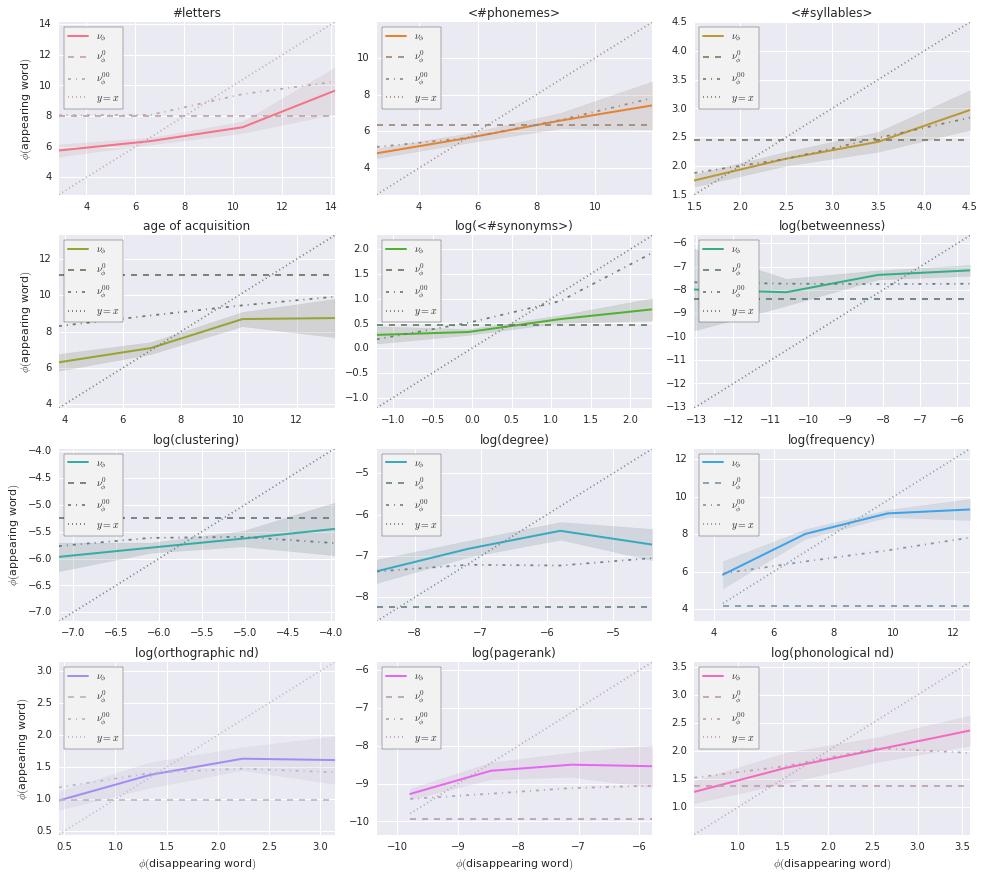

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

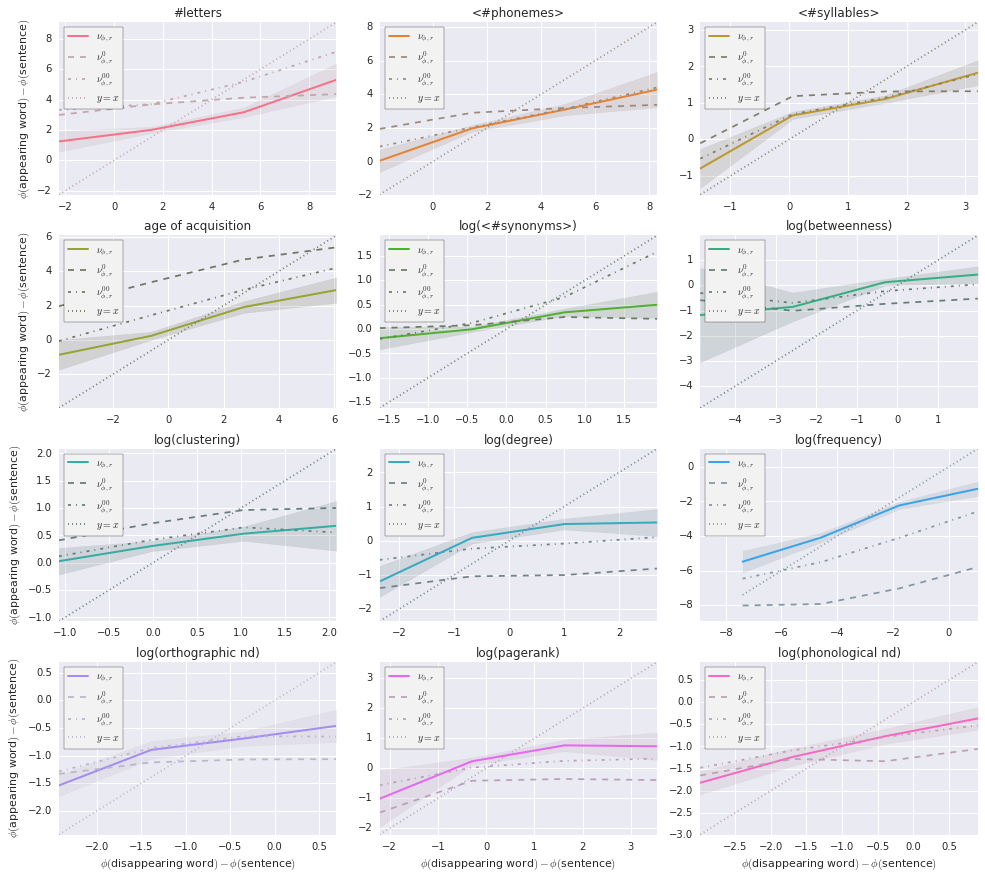

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

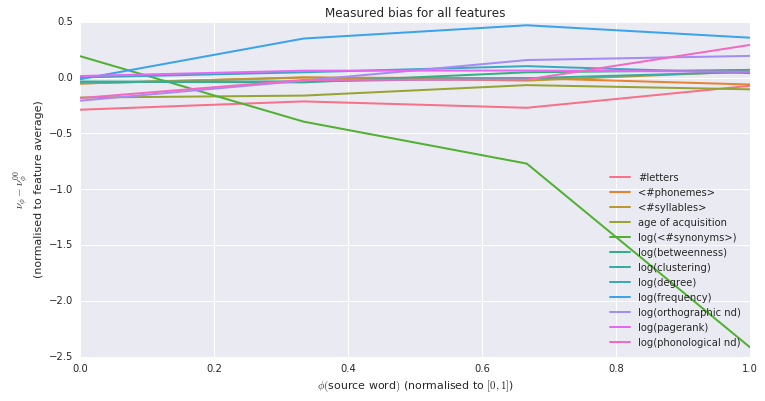

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

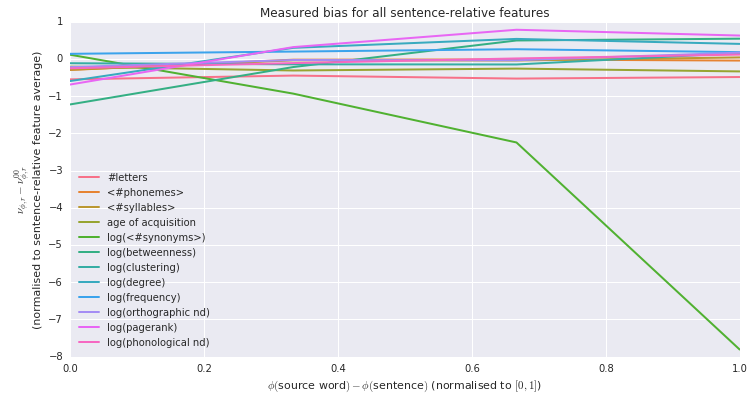

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

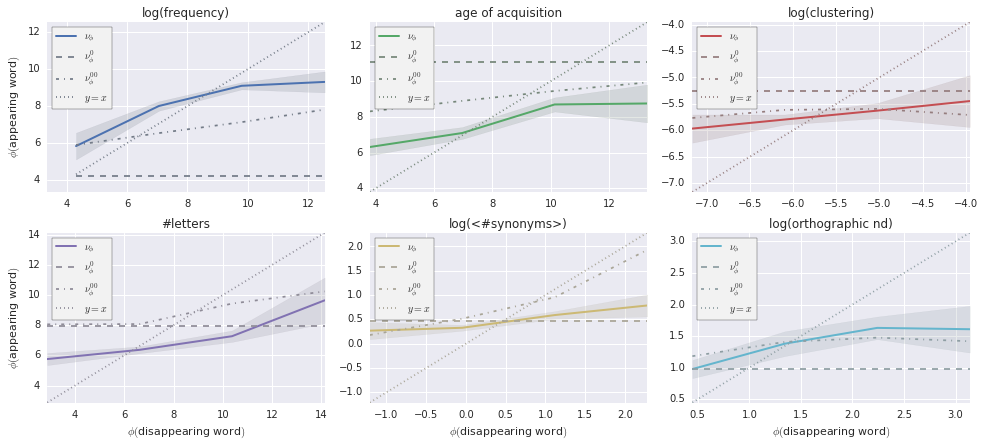

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

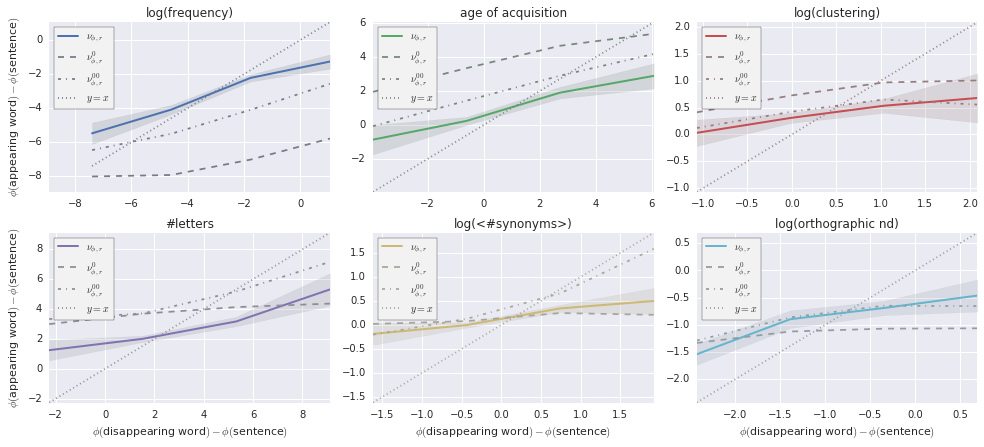

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

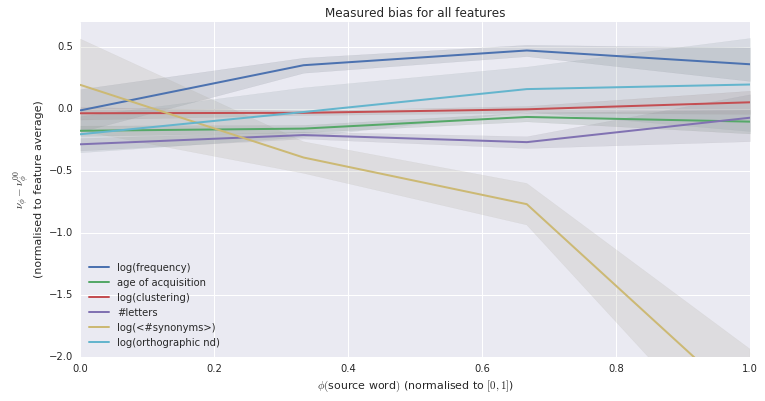

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

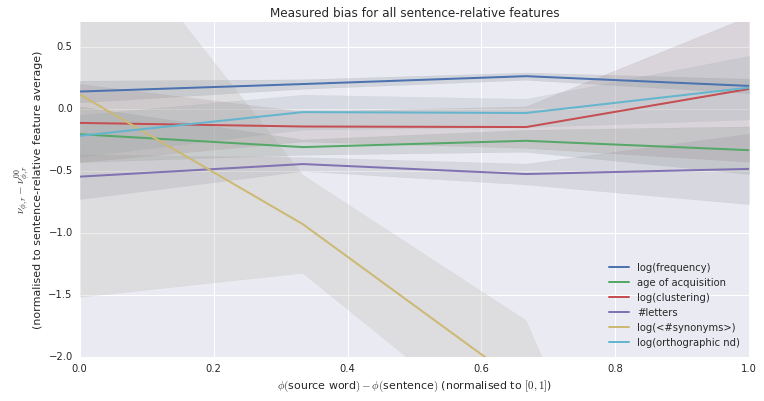

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


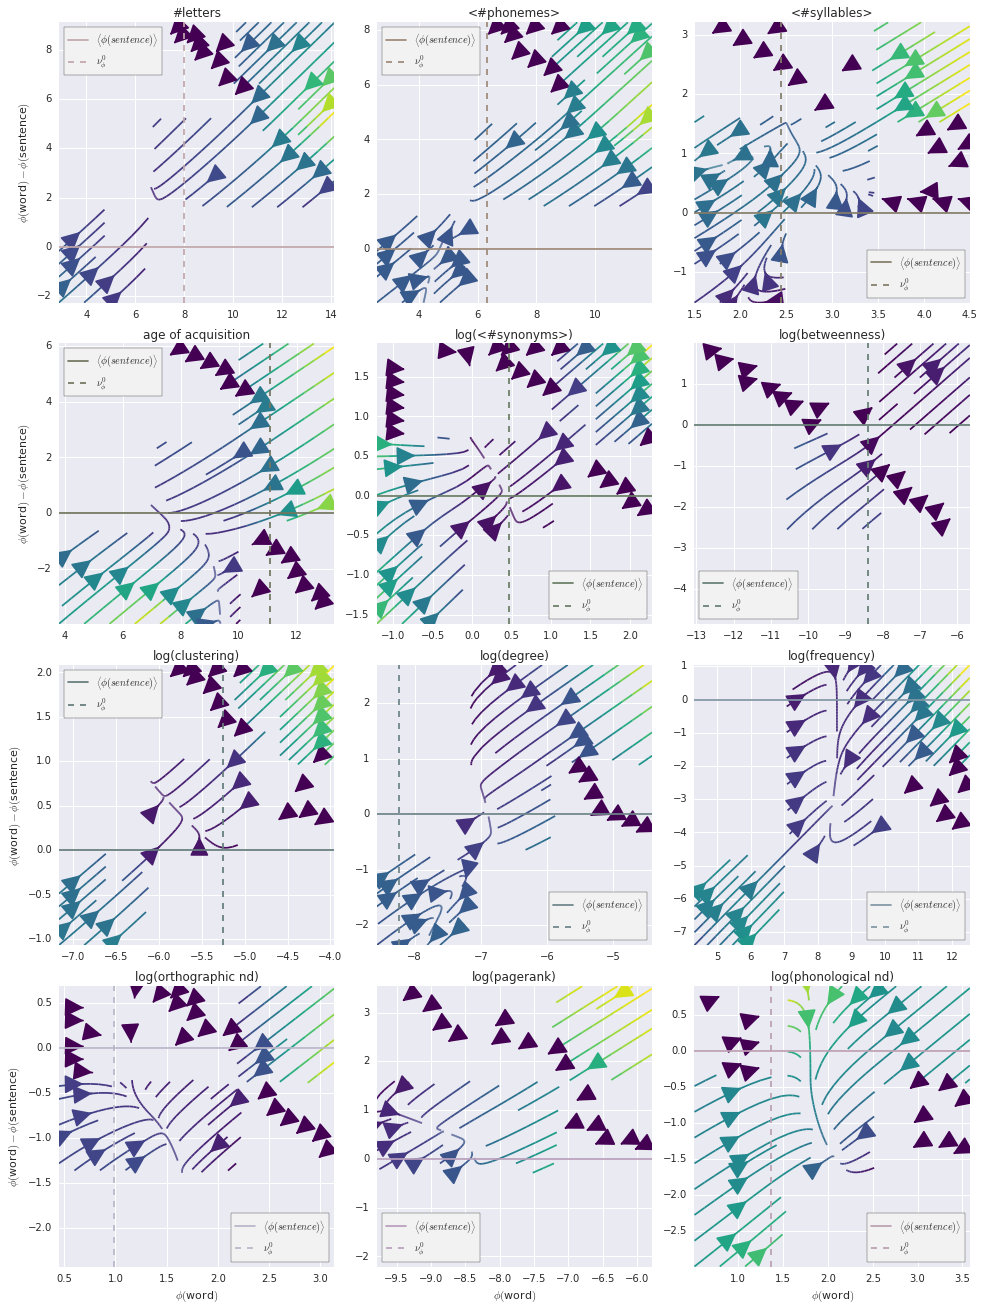

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


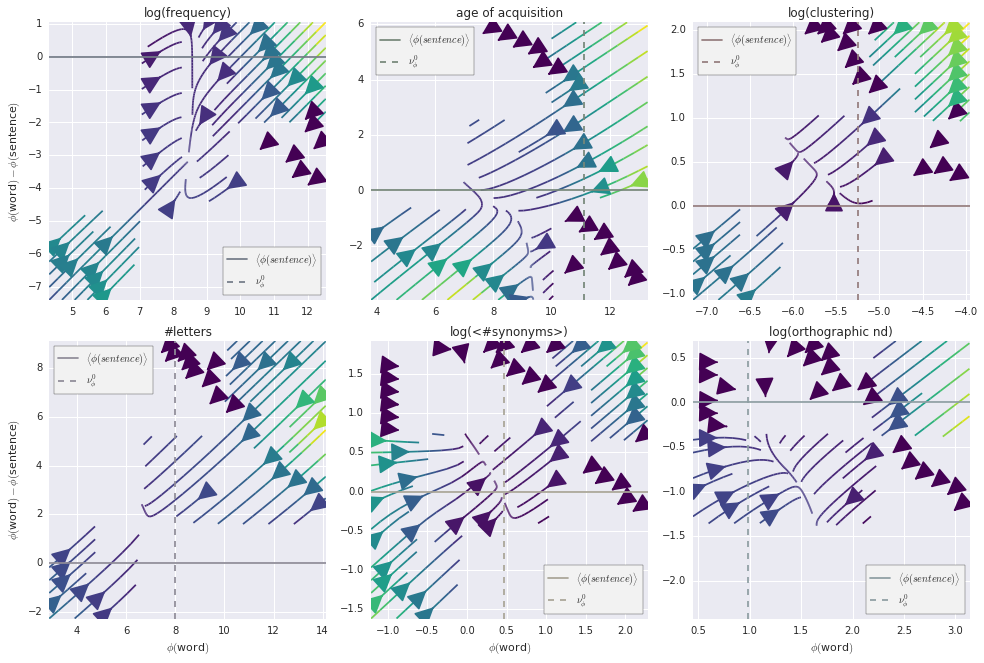

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.55109107  0.17756024  0.06977537  0.06691056  0.03280437  0.02850672
  0.01972067  0.01800782  0.01454582  0.00989354]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.478166,0.233421,-0.084415,0.221723,0.221599,-0.461400,0.208325,0.255886,-0.431755,0.270502,-0.173123,0.012521
Component-1,0.368713,-0.361715,0.136740,-0.279449,-0.330164,-0.401663,0.122732,-0.298513,-0.444085,0.196034,-0.161580,0.012641
Component-2,-0.761684,-0.439552,0.057617,-0.124994,-0.392508,0.129914,0.043593,-0.147501,0.059894,-0.080826,0.036035,0.040900


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 8978) |             | Elapsed Time: 0:00:43 ETA:  4 days, 13:03:40

  1% ( 113 of 8978) |                      | Elapsed Time: 0:00:44 ETA:  0:00:41

  2% ( 225 of 8978) |                      | Elapsed Time: 0:00:46 ETA:  0:00:45

  3% ( 317 of 8978) |                      | Elapsed Time: 0:00:47 ETA:  0:00:46

  3% ( 337 of 8978) |                      | Elapsed Time: 0:00:47 ETA:  0:00:47

  5% ( 449 of 8978) |#                     | Elapsed Time: 0:00:48 ETA:  0:00:42

  6% ( 562 of 8978) |#                     | Elapsed Time: 0:00:49 ETA:  0:00:36

  7% ( 674 of 8978) |#                     | Elapsed Time: 0:00:50 ETA:  0:00:34

  8% ( 786 of 8978) |#                     | Elapsed Time: 0:00:50 ETA:  0:00:30

 10% ( 898 of 8978) |##                    | Elapsed Time: 0:00:52 ETA:  0:00:29

 11% ( 989 of 8978) |##                    | Elapsed Time: 0:00:53 ETA:  0:00:30

 11% (1011 of 8978) |##                    | Elapsed Time: 0:00:53 ETA:  0:00:28

 12% (1123 of 8978) |##                    | Elapsed Time: 0:00:54 ETA:  0:00:28

 13% (1188 of 8978) |##                    | Elapsed Time: 0:00:55 ETA:  0:00:36

 13% (1235 of 8978) |###                   | Elapsed Time: 0:00:56 ETA:  0:00:40

 14% (1316 of 8978) |###                   | Elapsed Time: 0:00:57 ETA:  0:00:46

 15% (1347 of 8978) |###                   | Elapsed Time: 0:00:57 ETA:  0:00:50

 15% (1430 of 8978) |###                   | Elapsed Time: 0:00:58 ETA:  0:00:50

 16% (1459 of 8978) |###                   | Elapsed Time: 0:00:58 ETA:  0:00:51

 17% (1543 of 8978) |###                   | Elapsed Time: 0:00:59 ETA:  0:00:51

 17% (1572 of 8978) |###                   | Elapsed Time: 0:01:00 ETA:  0:00:55

 18% (1684 of 8978) |####                  | Elapsed Time: 0:01:01 ETA:  0:00:47

 20% (1796 of 8978) |####                  | Elapsed Time: 0:01:02 ETA:  0:00:40

 21% (1908 of 8978) |####                  | Elapsed Time: 0:01:03 ETA:  0:00:31

 22% (1995 of 8978) |####                  | Elapsed Time: 0:01:04 ETA:  0:00:31

 22% (2021 of 8978) |####                  | Elapsed Time: 0:01:04 ETA:  0:00:27

 23% (2133 of 8978) |#####                 | Elapsed Time: 0:01:05 ETA:  0:00:20

 25% (2245 of 8978) |#####                 | Elapsed Time: 0:01:06 ETA:  0:00:12

 26% (2357 of 8978) |#####                 | Elapsed Time: 0:01:07 ETA:  0:00:11

 27% (2446 of 8978) |#####                 | Elapsed Time: 0:01:08 ETA:  0:00:12

 27% (2469 of 8978) |######                | Elapsed Time: 0:01:08 ETA:  0:00:12

 28% (2582 of 8978) |######                | Elapsed Time: 0:01:09 ETA:  0:00:12

 30% (2694 of 8978) |######                | Elapsed Time: 0:01:10 ETA:  0:00:09

 31% (2784 of 8978) |######                | Elapsed Time: 0:01:11 ETA:  0:00:13

 31% (2806 of 8978) |######                | Elapsed Time: 0:01:12 ETA:  0:00:18

 32% (2918 of 8978) |#######               | Elapsed Time: 0:01:13 ETA:  0:00:16

 33% (3031 of 8978) |#######               | Elapsed Time: 0:01:14 ETA:  0:00:12

 35% (3143 of 8978) |#######               | Elapsed Time: 0:01:15 ETA:  0:00:08

 36% (3255 of 8978) |#######               | Elapsed Time: 0:01:15 ETA:  0:00:05

 37% (3367 of 8978) |########              | Elapsed Time: 0:01:17 ETA:  0:00:05

 38% (3479 of 8978) |########              | Elapsed Time: 0:01:18 ETA:  0:00:01

 40% (3592 of 8978) |########              | Elapsed Time: 0:01:19 ETA:  0:00:00

 41% (3704 of 8978) |#########             | Elapsed Time: 0:01:20 ETA:  0:00:00

 42% (3816 of 8978) |#########             | Elapsed Time: 0:01:21 ETA:  0:00:00

 43% (3928 of 8978) |#########             | Elapsed Time: 0:01:22 ETA:  0:00:00

 45% (4041 of 8978) |#########             | Elapsed Time: 0:01:23 ETA:  0:00:00

 46% (4153 of 8978) |##########            | Elapsed Time: 0:01:24 ETA:  0:00:00

 47% (4265 of 8978) |##########            | Elapsed Time: 0:01:25 ETA:  0:00:00

 48% (4377 of 8978) |##########            | Elapsed Time: 0:01:25 ETA:  0:00:00

 50% (4489 of 8978) |###########           | Elapsed Time: 0:01:26 ETA:  0:00:00

 51% (4602 of 8978) |###########           | Elapsed Time: 0:01:27 ETA:  0:00:00

 52% (4714 of 8978) |###########           | Elapsed Time: 0:01:28 ETA:  0:00:00

 53% (4826 of 8978) |###########           | Elapsed Time: 0:01:29 ETA:  0:00:00

 55% (4938 of 8978) |############          | Elapsed Time: 0:01:30 ETA:  0:00:00

 56% (5051 of 8978) |############          | Elapsed Time: 0:01:32 ETA:  0:00:00

 57% (5163 of 8978) |############          | Elapsed Time: 0:01:33 ETA:  0:00:00

 58% (5275 of 8978) |############          | Elapsed Time: 0:01:34 ETA:  0:00:00

 60% (5387 of 8978) |#############         | Elapsed Time: 0:01:35 ETA:  0:00:00

 61% (5500 of 8978) |#############         | Elapsed Time: 0:01:36 ETA:  0:00:00

 62% (5612 of 8978) |#############         | Elapsed Time: 0:01:37 ETA:  0:00:00

 63% (5724 of 8978) |##############        | Elapsed Time: 0:01:38 ETA:  0:00:00

 65% (5836 of 8978) |##############        | Elapsed Time: 0:01:38 ETA:  0:00:00

 66% (5948 of 8978) |##############        | Elapsed Time: 0:01:40 ETA:  0:00:00

 67% (6061 of 8978) |##############        | Elapsed Time: 0:01:41 ETA:  0:00:00

 68% (6173 of 8978) |###############       | Elapsed Time: 0:01:42 ETA:  0:00:00

 70% (6285 of 8978) |###############       | Elapsed Time: 0:01:43 ETA:  0:00:00

 71% (6397 of 8978) |###############       | Elapsed Time: 0:01:43 ETA:  0:00:00

 72% (6510 of 8978) |###############       | Elapsed Time: 0:01:44 ETA:  0:00:00

 73% (6622 of 8978) |################      | Elapsed Time: 0:01:46 ETA:  0:00:00

 74% (6705 of 8978) |################      | Elapsed Time: 0:01:47 ETA:  0:00:00

 75% (6734 of 8978) |################      | Elapsed Time: 0:01:47 ETA:  0:00:00

 76% (6846 of 8978) |################      | Elapsed Time: 0:01:48 ETA:  0:00:00

 77% (6958 of 8978) |#################     | Elapsed Time: 0:01:49 ETA:  0:00:00

 78% (7071 of 8978) |#################     | Elapsed Time: 0:01:50 ETA:  0:00:00

 80% (7183 of 8978) |#################     | Elapsed Time: 0:01:51 ETA:  0:00:00

 81% (7295 of 8978) |#################     | Elapsed Time: 0:01:52 ETA:  0:00:00

 82% (7407 of 8978) |##################    | Elapsed Time: 0:01:53 ETA:  0:00:00

 83% (7520 of 8978) |##################    | Elapsed Time: 0:01:53 ETA:  0:00:00

 85% (7632 of 8978) |##################    | Elapsed Time: 0:01:54 ETA:  0:00:00

 86% (7744 of 8978) |##################    | Elapsed Time: 0:01:56 ETA:  0:00:00

 87% (7856 of 8978) |###################   | Elapsed Time: 0:01:57 ETA:  0:00:00

 88% (7933 of 8978) |###################   | Elapsed Time: 0:01:58 ETA:  0:00:00

 88% (7968 of 8978) |###################   | Elapsed Time: 0:01:58 ETA:  0:00:00

 89% (8035 of 8978) |###################   | Elapsed Time: 0:02:01 ETA:  0:00:12

 90% (8081 of 8978) |###################   | Elapsed Time: 0:02:02 ETA:  0:00:20

 91% (8193 of 8978) |####################  | Elapsed Time: 0:02:03 ETA:  0:00:15

 92% (8305 of 8978) |####################  | Elapsed Time: 0:02:04 ETA:  0:00:03

 93% (8417 of 8978) |####################  | Elapsed Time: 0:02:05 ETA:  0:00:01

 95% (8530 of 8978) |####################  | Elapsed Time: 0:02:06 ETA:  0:00:00

 96% (8642 of 8978) |##################### | Elapsed Time: 0:02:07 ETA:  0:00:00

 97% (8754 of 8978) |##################### | Elapsed Time: 0:02:08 ETA:  0:00:00

 98% (8866 of 8978) |##################### | Elapsed Time: 0:02:09 ETA:  0:00:00

100% (8978 of 8978) |######################| Elapsed Time: 0:02:10 Time: 0:02:10


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

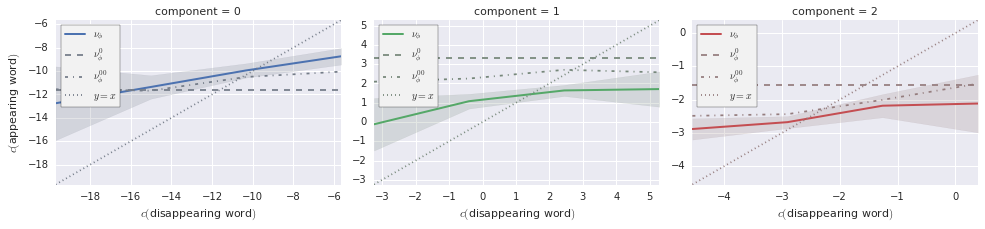

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.59149648  0.18714398  0.1210369 ]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.701185,-0.112136,0.294380,-0.578645,0.272128,0.014876
Component-1,0.401424,0.175058,-0.535177,-0.685689,0.227197,0.003426
Component-2,-0.567578,0.042596,-0.773562,0.271360,-0.033997,0.053387


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 8978) |               | Elapsed Time: 0:00:12 ETA:  1 day, 8:05:17

  1% ( 113 of 8978) |                      | Elapsed Time: 0:00:13 ETA:  0:01:10

  2% ( 225 of 8978) |                      | Elapsed Time: 0:00:14 ETA:  0:01:06

  3% ( 337 of 8978) |                      | Elapsed Time: 0:00:15 ETA:  0:01:01

  5% ( 449 of 8978) |#                     | Elapsed Time: 0:00:16 ETA:  0:00:58

  6% ( 562 of 8978) |#                     | Elapsed Time: 0:00:17 ETA:  0:00:54

  7% ( 674 of 8978) |#                     | Elapsed Time: 0:00:18 ETA:  0:00:52

  8% ( 786 of 8978) |#                     | Elapsed Time: 0:00:18 ETA:  0:00:50

 10% ( 898 of 8978) |##                    | Elapsed Time: 0:00:19 ETA:  0:00:50

 11% (1011 of 8978) |##                    | Elapsed Time: 0:00:20 ETA:  0:00:48

 12% (1123 of 8978) |##                    | Elapsed Time: 0:00:21 ETA:  0:00:47

 13% (1235 of 8978) |###                   | Elapsed Time: 0:00:22 ETA:  0:00:47

 15% (1347 of 8978) |###                   | Elapsed Time: 0:00:23 ETA:  0:00:47

 16% (1459 of 8978) |###                   | Elapsed Time: 0:00:24 ETA:  0:00:51

 17% (1572 of 8978) |###                   | Elapsed Time: 0:00:26 ETA:  0:00:56

 18% (1684 of 8978) |####                  | Elapsed Time: 0:00:27 ETA:  0:00:59

 20% (1796 of 8978) |####                  | Elapsed Time: 0:00:27 ETA:  0:00:54

 21% (1908 of 8978) |####                  | Elapsed Time: 0:00:28 ETA:  0:00:51

 22% (2021 of 8978) |####                  | Elapsed Time: 0:00:29 ETA:  0:00:51

 23% (2133 of 8978) |#####                 | Elapsed Time: 0:00:30 ETA:  0:00:44

 25% (2245 of 8978) |#####                 | Elapsed Time: 0:00:31 ETA:  0:00:41

 26% (2357 of 8978) |#####                 | Elapsed Time: 0:00:32 ETA:  0:00:37

 27% (2469 of 8978) |######                | Elapsed Time: 0:00:33 ETA:  0:00:36

 28% (2582 of 8978) |######                | Elapsed Time: 0:00:34 ETA:  0:00:36

 30% (2694 of 8978) |######                | Elapsed Time: 0:00:35 ETA:  0:00:35

 31% (2806 of 8978) |######                | Elapsed Time: 0:00:36 ETA:  0:00:36

 32% (2918 of 8978) |#######               | Elapsed Time: 0:00:36 ETA:  0:00:36

 33% (3031 of 8978) |#######               | Elapsed Time: 0:00:37 ETA:  0:00:37

 35% (3143 of 8978) |#######               | Elapsed Time: 0:00:38 ETA:  0:00:36

 36% (3255 of 8978) |#######               | Elapsed Time: 0:00:39 ETA:  0:00:32

 37% (3367 of 8978) |########              | Elapsed Time: 0:00:40 ETA:  0:00:32

 38% (3479 of 8978) |########              | Elapsed Time: 0:00:41 ETA:  0:00:29

 40% (3592 of 8978) |########              | Elapsed Time: 0:00:42 ETA:  0:00:27

 41% (3704 of 8978) |#########             | Elapsed Time: 0:00:42 ETA:  0:00:25

 42% (3816 of 8978) |#########             | Elapsed Time: 0:00:43 ETA:  0:00:24

 43% (3928 of 8978) |#########             | Elapsed Time: 0:00:44 ETA:  0:00:23

 45% (4041 of 8978) |#########             | Elapsed Time: 0:00:45 ETA:  0:00:22

 46% (4153 of 8978) |##########            | Elapsed Time: 0:00:46 ETA:  0:00:21

 47% (4265 of 8978) |##########            | Elapsed Time: 0:00:47 ETA:  0:00:21

 48% (4377 of 8978) |##########            | Elapsed Time: 0:00:48 ETA:  0:00:19

 50% (4489 of 8978) |###########           | Elapsed Time: 0:00:48 ETA:  0:00:18

 51% (4602 of 8978) |###########           | Elapsed Time: 0:00:49 ETA:  0:00:18

 52% (4714 of 8978) |###########           | Elapsed Time: 0:00:50 ETA:  0:00:17

 53% (4826 of 8978) |###########           | Elapsed Time: 0:00:51 ETA:  0:00:16

 55% (4938 of 8978) |############          | Elapsed Time: 0:00:52 ETA:  0:00:16

 56% (5051 of 8978) |############          | Elapsed Time: 0:00:53 ETA:  0:00:15

 57% (5163 of 8978) |############          | Elapsed Time: 0:00:54 ETA:  0:00:15

 58% (5275 of 8978) |############          | Elapsed Time: 0:00:54 ETA:  0:00:14

 60% (5387 of 8978) |#############         | Elapsed Time: 0:00:55 ETA:  0:00:14

 61% (5500 of 8978) |#############         | Elapsed Time: 0:00:56 ETA:  0:00:14

 62% (5612 of 8978) |#############         | Elapsed Time: 0:00:57 ETA:  0:00:13

 63% (5724 of 8978) |##############        | Elapsed Time: 0:00:58 ETA:  0:00:11

 65% (5836 of 8978) |##############        | Elapsed Time: 0:00:59 ETA:  0:00:10

 66% (5948 of 8978) |##############        | Elapsed Time: 0:01:00 ETA:  0:00:09

 67% (6061 of 8978) |##############        | Elapsed Time: 0:01:01 ETA:  0:00:08

 68% (6173 of 8978) |###############       | Elapsed Time: 0:01:01 ETA:  0:00:07

 70% (6285 of 8978) |###############       | Elapsed Time: 0:01:02 ETA:  0:00:06

 71% (6397 of 8978) |###############       | Elapsed Time: 0:01:03 ETA:  0:00:04

 72% (6510 of 8978) |###############       | Elapsed Time: 0:01:04 ETA:  0:00:03

 73% (6622 of 8978) |################      | Elapsed Time: 0:01:05 ETA:  0:00:04

 75% (6734 of 8978) |################      | Elapsed Time: 0:01:06 ETA:  0:00:05

 76% (6846 of 8978) |################      | Elapsed Time: 0:01:07 ETA:  0:00:06

 77% (6958 of 8978) |#################     | Elapsed Time: 0:01:08 ETA:  0:00:04

 78% (7071 of 8978) |#################     | Elapsed Time: 0:01:09 ETA:  0:00:03

 80% (7183 of 8978) |#################     | Elapsed Time: 0:01:09 ETA:  0:00:02

 81% (7295 of 8978) |#################     | Elapsed Time: 0:01:10 ETA:  0:00:00

 82% (7407 of 8978) |##################    | Elapsed Time: 0:01:11 ETA:  0:00:00

 83% (7520 of 8978) |##################    | Elapsed Time: 0:01:12 ETA:  0:00:00

 85% (7632 of 8978) |##################    | Elapsed Time: 0:01:13 ETA:  0:00:00

 86% (7744 of 8978) |##################    | Elapsed Time: 0:01:14 ETA:  0:00:00

 87% (7856 of 8978) |###################   | Elapsed Time: 0:01:15 ETA:  0:00:00

 88% (7968 of 8978) |###################   | Elapsed Time: 0:01:16 ETA:  0:00:00

 90% (8081 of 8978) |###################   | Elapsed Time: 0:01:17 ETA:  0:00:00

 91% (8193 of 8978) |####################  | Elapsed Time: 0:01:18 ETA:  0:00:00

 92% (8305 of 8978) |####################  | Elapsed Time: 0:01:18 ETA:  0:00:00

 93% (8417 of 8978) |####################  | Elapsed Time: 0:01:19 ETA:  0:00:00

 95% (8530 of 8978) |####################  | Elapsed Time: 0:01:20 ETA:  0:00:00

 96% (8642 of 8978) |##################### | Elapsed Time: 0:01:21 ETA:  0:00:00

 97% (8754 of 8978) |##################### | Elapsed Time: 0:01:22 ETA:  0:00:00

 98% (8866 of 8978) |##################### | Elapsed Time: 0:01:23 ETA:  0:00:00

100% (8978 of 8978) |######################| Elapsed Time: 0:01:24 Time: 0:01:24


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

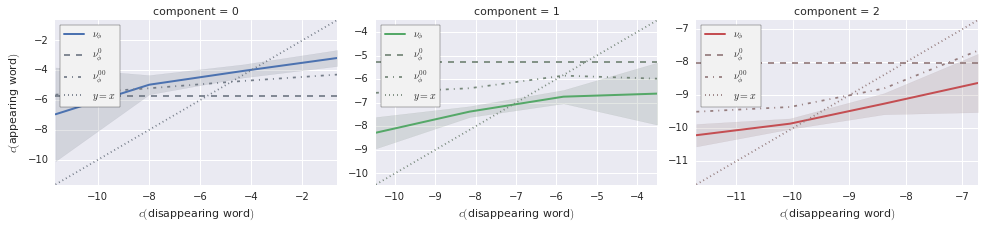

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 769 (cluster-unique) substitutions, but the PCA is in fact computed on 314 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.